Frecuencia de corte experimental (fc) encontrada cerca de los -3dB:
f_c ≈ 100.00 Hz
Atenuación en f_c: -1.94 dB


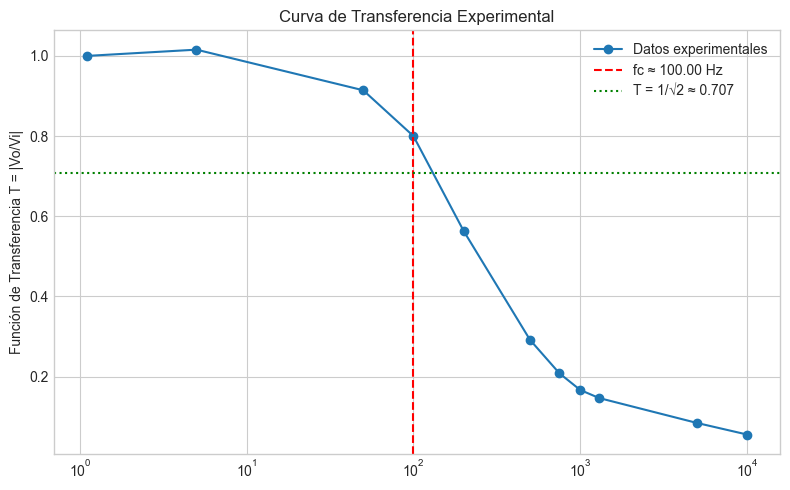

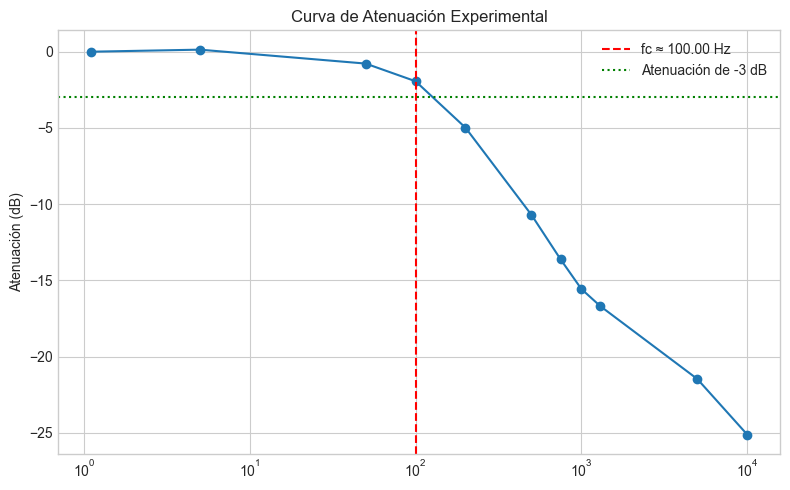

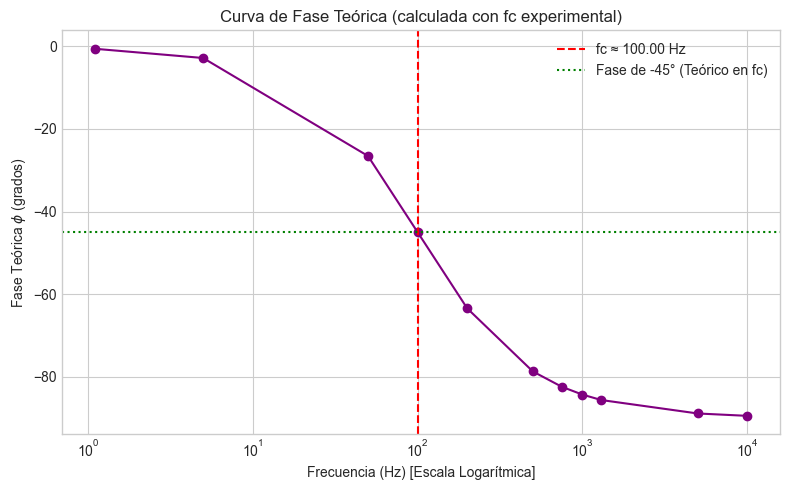

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# --- 1. Carga y Procesamiento de Datos ---

# Cargar los datos desde el archivo CSV
try:
    df = pd.read_csv('data.csv')
except FileNotFoundError:
    print("Error: El archivo 'data.csv' no se encontró.")
    print("Asegúrate de que el script y el archivo CSV estén en la misma carpeta.")
    exit()

# Extraer los datos a variables
frecuencia_hz = df['Frecuencia']
vi_pp = df['Ch1 (V)']
vo_pp = df['Ch2 (V)']

# --- 2. Cálculos de Transferencia y Atenuación (Experimentales) ---

# a) Calcular la Función de Transferencia (T)
# T = |Vo / Vi|
T = vo_pp / vi_pp

# b) Calcular la Atenuación (A) en decibeles (dB)
# A = 20 * log10(T)
A_db = 20 * np.log10(T)

# --- 3. Encontrar la Frecuencia de Corte Experimental (fc) ---

# La frecuencia de corte es donde la atenuación es de -3 dB.
# Buscamos el punto más cercano a -3 dB en nuestros datos experimentales.
idx_corte = np.abs(A_db - (-3.0)).idxmin()
f_corte = frecuencia_hz[idx_corte]
A_corte = A_db[idx_corte]

print(f"Frecuencia de corte experimental (fc) encontrada cerca de los -3dB:")
print(f"f_c ≈ {f_corte:.2f} Hz")
print(f"Atenuación en f_c: {A_corte:.2f} dB")

# --- 4. Cálculo de la Fase (Teórica) ---

# Al no tener datos de delta_t, no podemos calcular la fase experimental.
# En su lugar, calculamos la curva teórica usando la fc experimental.
# La fórmula teórica de la fase para un filtro pasabajos es: phi = -arctan(f / fc)
phi_teorico_deg = -np.arctan(frecuencia_hz / f_corte) * (180 / np.pi)

# --- 5. Generación de Gráficos ---

plt.style.use('seaborn-v0_8-whitegrid')

# a) Gráfico de la Curva de Transferencia (Experimental)
plt.figure(figsize=(8, 5))
plt.semilogx(frecuencia_hz, T, 'o-', label='Datos experimentales')
plt.ylabel('Función de Transferencia T = |Vo/Vi|')
plt.title('Curva de Transferencia Experimental')
plt.axvline(x=f_corte, color='r', linestyle='--', label=f'fc ≈ {f_corte:.2f} Hz')
plt.axhline(y=1/np.sqrt(2), color='g', linestyle=':', label='T = 1/√2 ≈ 0.707')
plt.legend()
plt.tight_layout()
plt.show()

# b) Gráfico de la Curva de Atenuación (Experimental)
plt.figure(figsize=(8, 5))
plt.semilogx(frecuencia_hz, A_db, 'o-')
plt.ylabel('Atenuación (dB)')
plt.title('Curva de Atenuación Experimental')
plt.axvline(x=f_corte, color='r', linestyle='--', label=f'fc ≈ {f_corte:.2f} Hz')
plt.axhline(y=-3, color='g', linestyle=':', label='Atenuación de -3 dB')
plt.legend()
plt.tight_layout()
plt.show()

# c) Gráfico de la Diferencia de Fase (Teórica)
plt.figure(figsize=(8, 5))
plt.semilogx(frecuencia_hz, phi_teorico_deg, 'o-', color='purple')
plt.ylabel(r'Fase Teórica $\phi$ (grados)')
plt.xlabel('Frecuencia (Hz) [Escala Logarítmica]')
plt.title(r'Curva de Fase Teórica (calculada con fc experimental)')
plt.axvline(x=f_corte, color='r', linestyle='--', label=f'fc ≈ {f_corte:.2f} Hz')
plt.axhline(y=-45, color='g', linestyle=':', label='Fase de -45° (Teórico en fc)')
plt.legend()
plt.tight_layout()
plt.show()

C:\Users\tomas\AppData\Local\Temp\ipykernel_22668\1812484309.py:47: UserWarning: Glyph 8345 (\N{LATIN SUBSCRIPT SMALL LETTER N}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\tomas\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 8345 (\N{LATIN SUBSCRIPT SMALL LETTER N}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


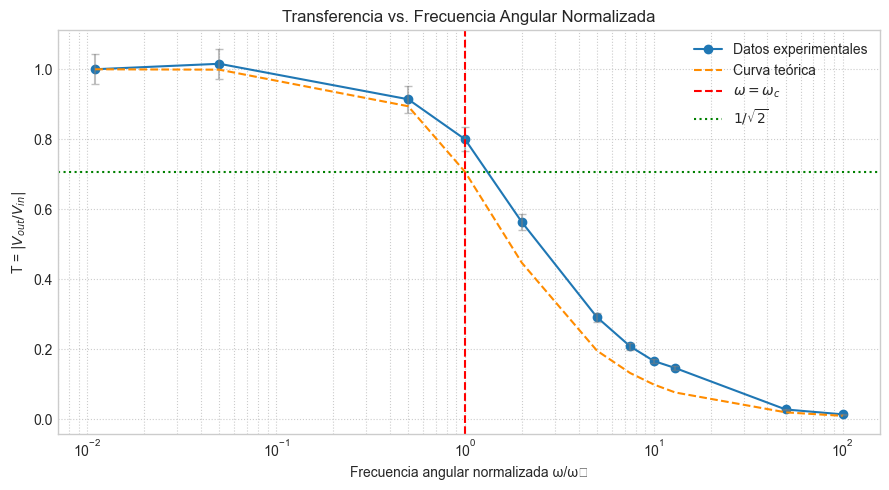

C:\Users\tomas\AppData\Local\Temp\ipykernel_22668\1812484309.py:62: UserWarning: Glyph 8345 (\N{LATIN SUBSCRIPT SMALL LETTER N}) missing from font(s) Arial.
  plt.tight_layout()


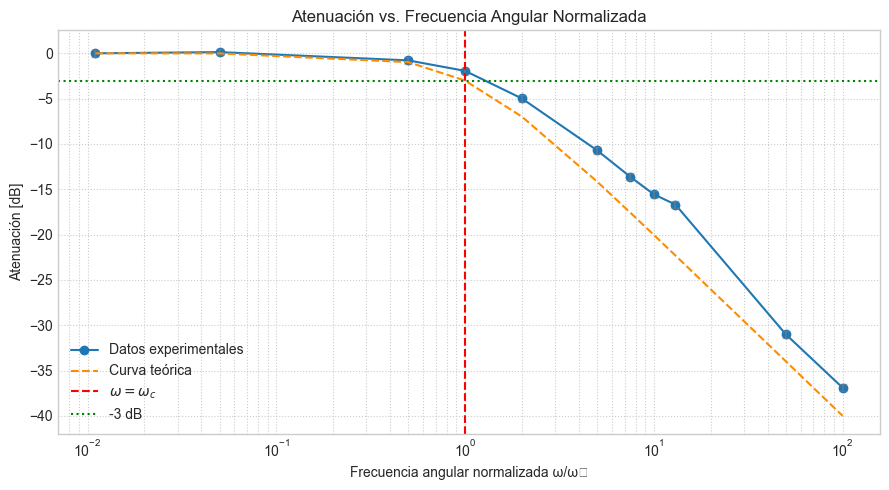

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# --- 1. Carga de Datos ---
df = pd.read_csv('data.csv')
frecuencia_hz = df['Frecuencia']
vi_pp = df['Ch1 (V)']
vo_pp = df['Ch2 (V)']

# --- 2. Calcular Transferencia y Atenuación ---
T = vo_pp / vi_pp
A_db = 20 * np.log10(T)

# --- 3. Calcular errores de medición (3% en Vi y Vo) ---
error_vi = 0.03 * vi_pp
error_vo = 0.03 * vo_pp
rel_error_T = np.sqrt((error_vo / vo_pp)**2 + (error_vi / vi_pp)**2)
error_T = T * rel_error_T
error_A_db = 8.686 * rel_error_T  # Propagación logarítmica

# --- 4. Frecuencia de corte (donde A ≈ -3dB) ---
idx_corte = np.abs(A_db + 3).idxmin()
f_corte = frecuencia_hz[idx_corte]
w_corte = 2 * np.pi * f_corte

# --- 5. Frecuencia angular normalizada ---
w = 2 * np.pi * frecuencia_hz
w_norm = w / w_corte

# --- 6. Curvas teóricas ---
T_teorica = 1 / np.sqrt(1 + w_norm**2)
A_teorica_db = 20 * np.log10(T_teorica)

# --- 7. Gráfico: Transferencia vs. Frecuencia Angular Normalizada ---
plt.figure(figsize=(9, 5))
plt.semilogx(w_norm, T, 'o-', label='Datos experimentales')
plt.errorbar(w_norm, T, yerr=error_T, fmt='none', ecolor='gray', alpha=0.5, capsize=3)
plt.semilogx(w_norm, T_teorica, '--', color='darkorange', label='Curva teórica')
plt.axvline(1, color='red', linestyle='--', label=r'$\omega = \omega_c$')
plt.axhline(1/np.sqrt(2), color='green', linestyle=':', label=r'$1/\sqrt{2}$')
plt.xlabel('Frecuencia angular normalizada ω/ωₙ')
plt.ylabel(r'T = $|V_{out}/V_{in}|$')
plt.title('Transferencia vs. Frecuencia Angular Normalizada')
plt.grid(True, which="both", ls=":")
plt.legend()
plt.tight_layout()
plt.show()

# --- 8. Gráfico: Atenuación vs. Frecuencia Angular Normalizada ---
plt.figure(figsize=(9, 5))
plt.semilogx(w_norm, A_db, 'o-', label='Datos experimentales')
plt.errorbar(w_norm, A_db, yerr=error_A_db, fmt='none', ecolor='gray', alpha=0.5, capsize=3)
plt.semilogx(w_norm, A_teorica_db, '--', color='darkorange', label='Curva teórica')
plt.axvline(1, color='red', linestyle='--', label=r'$\omega = \omega_c$')
plt.axhline(-3, color='green', linestyle=':', label=r'-3 dB')
plt.xlabel('Frecuencia angular normalizada ω/ωₙ')
plt.ylabel('Atenuación [dB]')
plt.title('Atenuación vs. Frecuencia Angular Normalizada')
plt.grid(True, which="both", ls=":")
plt.legend()
plt.tight_layout()
plt.show()
